<h1>Losses over lead times

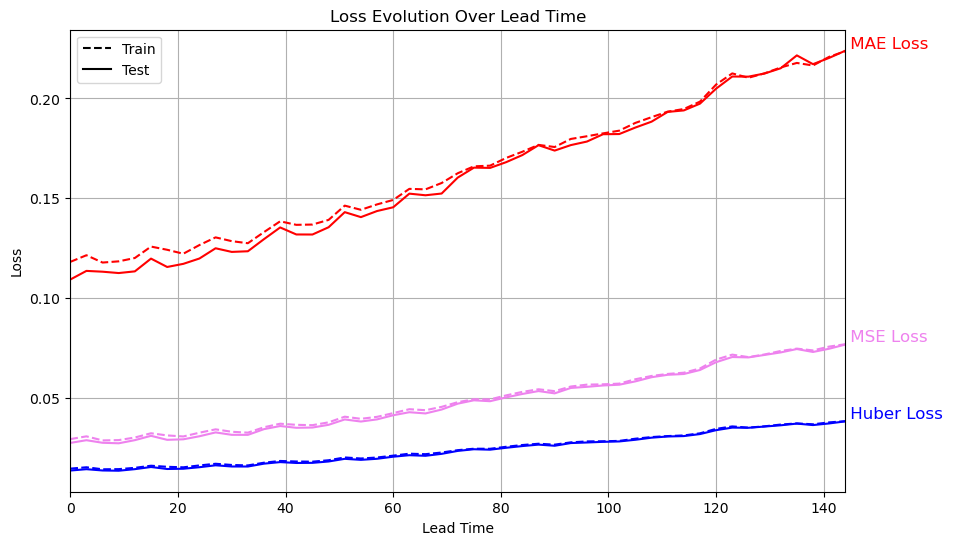

In [1]:
import joblib
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


# Load all parameters
models = joblib.load("parameters/models.pth")
losses = joblib.load("parameters/losses.pkl")

# Convert lead times to sorted list
lead_times = sorted(models.keys())

# Extract losses for plotting
train_huber_losses = [losses[lt]["Training"]["Huber"] for lt in lead_times]
train_mae_losses = [losses[lt]["Training"]["MAE"] for lt in lead_times]
train_mse_losses = [losses[lt]["Training"]["MSE"] for lt in lead_times]

test_huber_losses = [losses[lt]["Testing"]["Huber"] for lt in lead_times]
test_mae_losses = [losses[lt]["Testing"]["MAE"] for lt in lead_times]
test_mse_losses = [losses[lt]["Testing"]["MSE"] for lt in lead_times]

# Plot losses over lead time
plt.figure(figsize=(10, 6))

# Plot Train (Dashed)
plt.plot(lead_times, train_huber_losses, linestyle="dashed", color="blue")
plt.plot(lead_times, train_mae_losses, linestyle="dashed", color="red")
plt.plot(lead_times, train_mse_losses, linestyle="dashed", color="violet")

# Plot Test (Solid)
plt.plot(lead_times, test_huber_losses, linestyle="solid", color="blue")
plt.plot(lead_times, test_mae_losses, linestyle="solid", color="red")
plt.plot(lead_times, test_mse_losses, linestyle="solid", color="violet")

# Add text labels near one of the lines (adjust position manually)
plt.text(lead_times[-1], train_huber_losses[-1], " Huber Loss", color="blue", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], train_mae_losses[-1], " MAE Loss", color="red", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], train_mse_losses[-1], " MSE Loss", color="violet", fontsize=12, verticalalignment='bottom')

# Add a simplified legend for line styles
plt.plot([], [], linestyle="dashed", color="black", label="Train")
plt.plot([], [], linestyle="solid", color="black", label="Test")
plt.legend()

plt.xlabel("Lead Time")
plt.ylabel("Loss")
plt.xlim(0, 144)
plt.title("Loss Evolution Over Lead Time")
plt.grid(True)
plt.show()


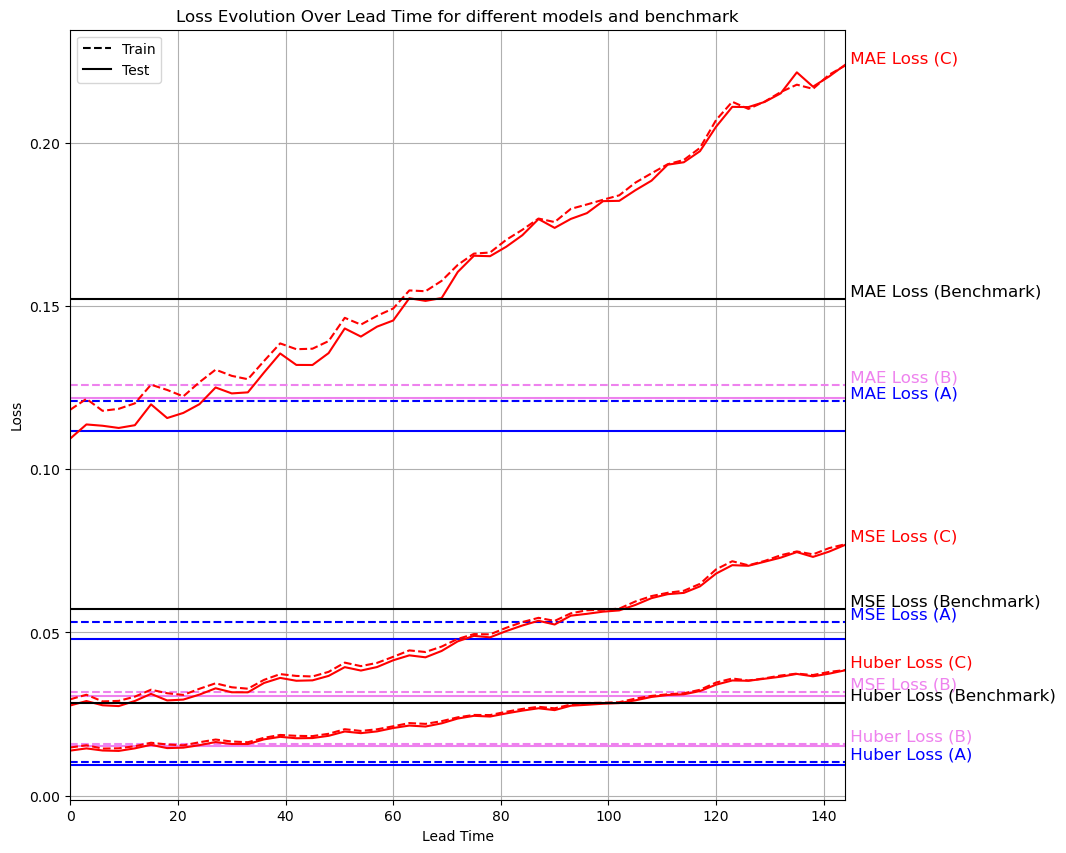

In [13]:
import joblib
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


# Model A
model_a_huber_train = 0.0103
model_a_mae_train = 0.1208
model_a_mse_train = 0.0532

model_a_huber_test = 0.0095
model_a_mae_test = 0.1116
model_a_mse_test = 0.0479

# Model B
model_b_huber_train = 0.0158
model_b_mae_train = 0.1257
model_b_mse_train = 0.0317

model_b_huber_test = 0.0152
model_b_mae_test = 0.1218
model_b_mse_test = 0.0304

# Model C
models = joblib.load("parameters/models.pth")
losses = joblib.load("parameters/losses.pkl")

lead_times = sorted(models.keys())

train_huber_losses = [losses[lt]["Training"]["Huber"] for lt in lead_times]
train_mae_losses = [losses[lt]["Training"]["MAE"] for lt in lead_times]
train_mse_losses = [losses[lt]["Training"]["MSE"] for lt in lead_times]

test_huber_losses = [losses[lt]["Testing"]["Huber"] for lt in lead_times]
test_mae_losses = [losses[lt]["Testing"]["MAE"] for lt in lead_times]
test_mse_losses = [losses[lt]["Testing"]["MSE"] for lt in lead_times]

# Benchmark
benchmark_huber = 0.0285
benchmark_mae = 0.1522
benchmark_mse = 0.0571



plt.figure(figsize=(10, 10))

# Model A
plt.axhline(y=model_a_huber_train, color="blue", linestyle="dashed")
plt.axhline(y=model_a_mae_train, color="blue", linestyle="dashed")
plt.axhline(y=model_a_mse_train, color="blue", linestyle="dashed")

plt.axhline(y=model_a_huber_test, color="blue", linestyle="solid")
plt.axhline(y=model_a_mae_test, color="blue", linestyle="solid")
plt.axhline(y=model_a_mse_test, color="blue", linestyle="solid")

# Model B
plt.axhline(y=model_b_huber_train, color="violet", linestyle="dashed")
plt.axhline(y=model_b_mae_train, color="violet", linestyle="dashed")
plt.axhline(y=model_b_mse_train, color="violet", linestyle="dashed")

plt.axhline(y=model_b_huber_test, color="violet", linestyle="solid")
plt.axhline(y=model_b_mae_test, color="violet", linestyle="solid")
plt.axhline(y=model_b_mse_test, color="violet", linestyle="solid")

# Model C
plt.plot(lead_times, train_huber_losses, color="red", linestyle="dashed")
plt.plot(lead_times, train_mae_losses, color="red", linestyle="dashed")
plt.plot(lead_times, train_mse_losses, color="red", linestyle="dashed")

plt.plot(lead_times, test_huber_losses, color="red", linestyle="solid")
plt.plot(lead_times, test_mae_losses, color="red", linestyle="solid")
plt.plot(lead_times, test_mse_losses, color="red", linestyle="solid")

# Benchmark
plt.axhline(y=benchmark_huber, color="black", linestyle="solid")
plt.axhline(y=benchmark_mae, color="black", linestyle="solid")
plt.axhline(y=benchmark_mse, color="black", linestyle="solid")


# Model a
plt.text(lead_times[-1], model_a_huber_train, " Huber Loss (A)", color="blue", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], model_a_mae_train, " MAE Loss (A)", color="blue", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], model_a_mse_train, " MSE Loss (A)", color="blue", fontsize=12, verticalalignment='bottom')

# Model B
plt.text(lead_times[-1], model_b_huber_train, " Huber Loss (B)", color="violet", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], model_b_mae_train, " MAE Loss (B)", color="violet", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], model_b_mse_train, " MSE Loss (B)", color="violet", fontsize=12, verticalalignment='bottom')

# Model C
plt.text(lead_times[-1], train_huber_losses[-1], " Huber Loss (C)", color="red", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], train_mae_losses[-1], " MAE Loss (C)", color="red", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], train_mse_losses[-1], " MSE Loss (C)", color="red", fontsize=12, verticalalignment='bottom')

# Benchmark
plt.text(lead_times[-1], benchmark_huber, " Huber Loss (Benchmark)", color="black", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], benchmark_mae, " MAE Loss (Benchmark)", color="black", fontsize=12, verticalalignment='bottom')
plt.text(lead_times[-1], benchmark_mse, " MSE Loss (Benchmark)", color="black", fontsize=12, verticalalignment='bottom')


# Add a simplified legend for model labels
plt.plot([], [], linestyle="dashed", color="black", label="Train")
plt.plot([], [], linestyle="solid", color="black", label="Test")
plt.legend()

plt.xlabel("Lead Time")
plt.ylabel("Loss")
plt.xlim(0, 144)
plt.title("Loss Evolution Over Lead Time for different models and benchmark")
plt.grid(True)
plt.show()


In [2]:
test_huber_losses

[0.013824466078210102,
 0.014495395915153815,
 0.013853653422166386,
 0.013729167050713465,
 0.014513022873214767,
 0.015594689437152937,
 0.014593259474274022,
 0.014723113371000197,
 0.015489298131767294,
 0.016443250171779184,
 0.015846315246163,
 0.015834990301633687,
 0.017269417036660625,
 0.018041188854384813,
 0.01760754235382125,
 0.017668745466179102,
 0.0183525887903849,
 0.01967797345246361,
 0.019170864509963307,
 0.01970805023094313,
 0.020744438948239522,
 0.021493231452536316,
 0.021198003285265467,
 0.022172104187896943,
 0.02364660281168877,
 0.024476498307254138,
 0.024255194517465762,
 0.02521596822559742,
 0.026068874459225136,
 0.026788793424165357,
 0.026220019442050248,
 0.027573272370434953,
 0.02785676139116776,
 0.02818425880323718,
 0.02838126792151534,
 0.029217564370273445,
 0.03025997979719131,
 0.03085818740910066,
 0.03106330679862899,
 0.03206346523371299,
 0.03402293781696468,
 0.03530388914178313,
 0.03521287688273167,
 0.03583315974377866,
 0.036460

<h1>Input sizes over lead times

In [ ]:
import joblib
import matplotlib.pyplot as plt

input_sizes = joblib.load("parameters/input_sizes.pkl")

# Plot input_sizes over lead time
input_sizes_values = [input_sizes[lt] for lt in lead_times]

plt.figure(figsize=(10, 6))
plt.plot(lead_times, input_sizes_values, marker="o", linestyle="solid")
plt.xlabel("Lead Time")
plt.ylabel("Input Size")
plt.title("Input Size Evolution Over Lead Time")
plt.grid(True)
plt.show()

<h1>Predictions over Hub heights and Ages

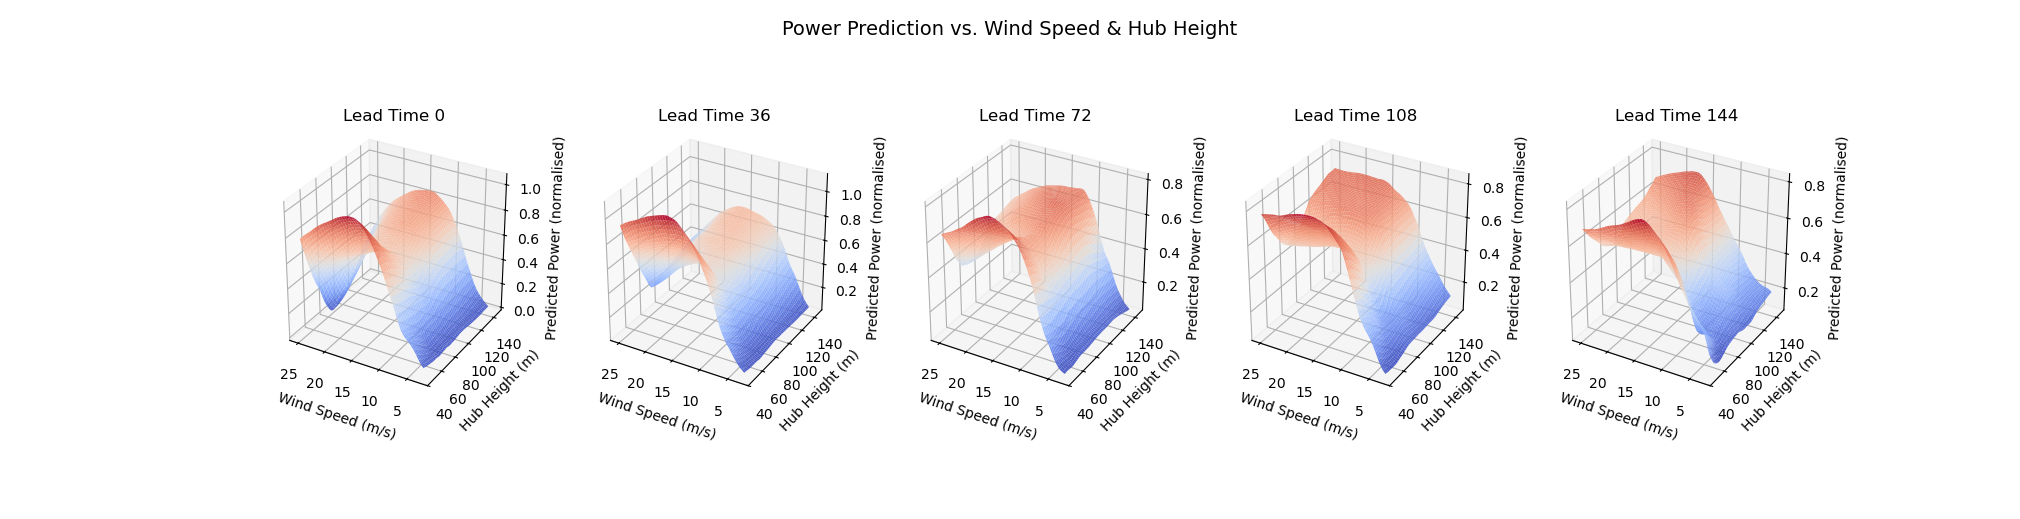

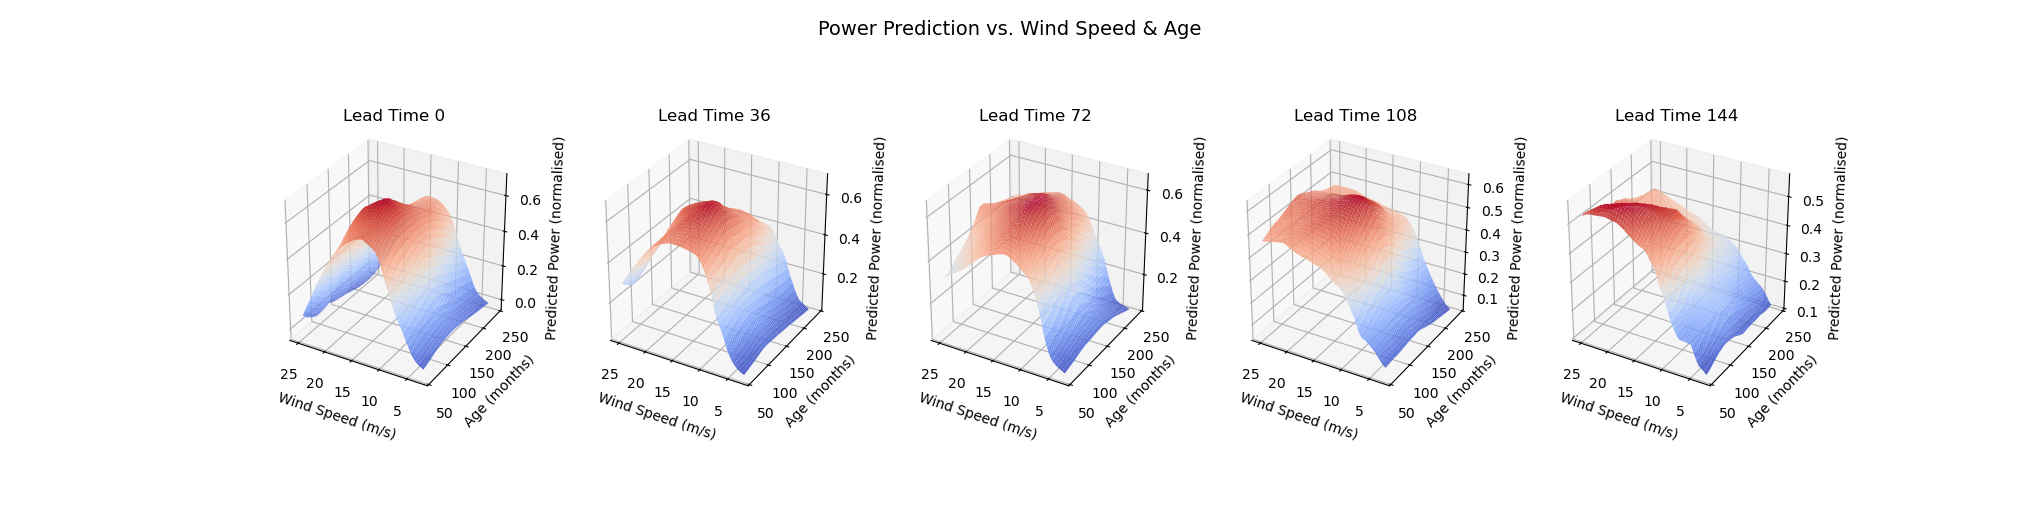

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

models = joblib.load("parameters/models.pth")
scalers = joblib.load("parameters/scalers.pkl")
encoders = joblib.load("parameters/encoders.pkl")

# Define MLP class
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.3366)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

def generate_3D_plot(ax, model, scaler_wind, scaler_hub, scaler_age, lead_time, feature_range, feature_name, wind_speed_range=(3, 25), hub_height=90, age=100):

    wind_speeds = np.linspace(*wind_speed_range, 50)  # Wind speeds from 3 to 25 m/s
    wind_speeds_grid, feature_grid = np.meshgrid(wind_speeds, feature_range)

    wind_speeds_flat = wind_speeds_grid.flatten()  # Shape: (5000,)
    feature_flat = feature_grid.flatten()  # Shape: (5000,)

    # Scale wind speeds
    wind_speeds_scaled = scaler_wind.transform(wind_speeds_flat.reshape(-1, 1)).flatten()

    num_samples = len(wind_speeds_scaled)  # Ensure all arrays have the same shape

    # Get number of turbine types and distribute uniformly
    num_turbine_types = len(encoders[lead_time].categories_[0])  
    avg_turbine_type = np.full((num_samples, num_turbine_types), 1/num_turbine_types)

    if feature_name == "hub_height":
        hub_heights_scaled = scaler_hub.transform(feature_flat.reshape(-1, 1)).flatten()
        ages_scaled = scaler_age.transform(np.full((num_samples, 1), age)).flatten()
    elif feature_name == "age":
        hub_heights_scaled = scaler_hub.transform(np.full((num_samples, 1), hub_height)).flatten()
        ages_scaled = scaler_age.transform(feature_flat.reshape(-1, 1)).flatten()

    # Ensure all arrays are correctly reshaped
    wind_speeds_scaled = wind_speeds_scaled.reshape(-1, 1)
    hub_heights_scaled = hub_heights_scaled.reshape(-1, 1)
    ages_scaled = ages_scaled.reshape(-1, 1)

    # Construct feature matrix
    all_features = np.hstack([
        avg_turbine_type,  
        hub_heights_scaled,
        ages_scaled,
        wind_speeds_scaled
    ])

    # Make predictions
    input_tensor = torch.tensor(all_features, dtype=torch.float32)
    with torch.no_grad():
        predictions = model(input_tensor).numpy().flatten()

    # Reshape predictions to match the grid
    predictions_grid = predictions.reshape(wind_speeds_grid.shape)

    # Plot the surface
    surf = ax.plot_surface(wind_speeds_grid, feature_grid, predictions_grid, cmap='coolwarm', edgecolor='none', alpha=0.9)

    ax.set_xlim(ax.get_xlim()[::-1])  # Flip the x-axis
    ax.set_title(f"Lead Time {lead_time}")
    ax.set_xlabel("Wind Speed (m/s)")
    ax.set_ylabel("Hub Height (m)" if feature_name == "hub_height" else "Age (months)")
    ax.set_zlabel("Predicted Power (normalised)")
    ax.set_box_aspect([1, 1, 1])


# Define Lead Times
selected_lead_times = [0, 36, 72, 108, 144]

# 1st Row: Wind Speed vs. Hub Height
fig1, axes1 = plt.subplots(1, 5, figsize=(20, 5), subplot_kw={'projection': '3d'})
fig1.suptitle("Power Prediction vs. Wind Speed & Hub Height", fontsize=14)

for i, lt in enumerate(selected_lead_times):
    model = MLP(input_sizes[lt])
    model.load_state_dict(models[lt])
    model.eval()
    generate_3D_plot(axes1[i], model, scalers[lt]["wind_scaler"], scalers[lt]["scaler_hub_heights"], scalers[lt]["scaler_ages"],
                     lt, np.linspace(47, 145, 100), feature_name="hub_height", age=100)

fig1.add_axes([0,0,1,1]).axis("off")
plt.show()

# 2nd Row: Wind Speed vs. Age
fig2, axes2 = plt.subplots(1, 5, figsize=(20, 5), subplot_kw={'projection': '3d'})
fig2.suptitle("Power Prediction vs. Wind Speed & Age", fontsize=14)

for i, lt in enumerate(selected_lead_times):
    model = MLP(input_sizes[lt])
    model.load_state_dict(models[lt])
    model.eval()
    generate_3D_plot(axes2[i], model, scalers[lt]["wind_scaler"], scalers[lt]["scaler_hub_heights"], scalers[lt]["scaler_ages"],
                     lt, np.linspace(60, 240, 100), feature_name="age", hub_height=90)

fig2.add_axes([0,0,1,1]).axis("off")
plt.show()
